<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_4)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-4_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,41.325621,-0.000576,51.325044,51.325645,-0.000600
1,0.0,1.0,39.724730,-0.000240,49.724490,49.724755,-0.000265
2,0.0,2.0,39.435464,0.000456,49.435920,49.435490,0.000430
3,0.0,3.0,21.822790,-0.002509,31.820282,31.822832,-0.002550
4,0.0,4.0,80.374896,-0.000072,90.374825,90.374886,-0.000061
...,...,...,...,...,...,...,...
59995,999.0,55.0,34.348029,-0.000458,44.347571,44.347946,-0.000374
59996,999.0,56.0,56.800469,-0.000008,66.800462,66.800433,0.000029
59997,999.0,57.0,91.791590,-0.000141,101.791449,101.791627,-0.000177
59998,999.0,58.0,84.086748,-0.000060,94.086688,94.086768,-0.000080


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    41.325621 -0.000576   51.325044   51.325645 -0.000600
      1.0    39.724730 -0.000240   49.724490   49.724755 -0.000265
      2.0    39.435464  0.000456   49.435920   49.435490  0.000430
      3.0    21.822790 -0.002509   31.820282   31.822832 -0.002550
      4.0    80.374896 -0.000072   90.374825   90.374886 -0.000061
...                ...       ...         ...         ...       ...
999.0 55.0   34.348029 -0.000458   44.347571   44.347946 -0.000374
      56.0   56.800469 -0.000008   66.800462   66.800433  0.000029
      57.0   91.791590 -0.000141  101.791449  101.791627 -0.000177
      58.0   84.086748 -0.000060   94.086688   94.086768 -0.000080
      59.0   94.049257 -0.000127  104.049130  104.049299 -0.000168

[60000 rows x 5 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    41.325621 -0.000576   51.325044   51.325645 -0.000600
      1.0    39.724730 -0.000240   49.724490   49.724755 -0.000265
      2.0    39.435464  0.000456   49.435920   49.435490  0.000430
      3.0    21.822790 -0.002509   31.820282   31.822832 -0.002550
      4.0    80.374896 -0.000072   90.374825   90.374886 -0.000061
...                ...       ...         ...         ...       ...
999.0 55.0   34.348029 -0.000458   44.347571   44.347946 -0.000374
      56.0   56.800469 -0.000008   66.800462   66.800433  0.000029
      57.0   91.791590 -0.000141  101.791449  101.791627 -0.000177
      58.0   84.086748 -0.000060   94.086688   94.086768 -0.000080
      59.0   94.049257 -0.000127  104.049130  104.049299 -0.000168

[60000 rows x 5 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,41.325621,-0.000576,51.325044,51.325645,-0.000600
1,0.0,1.0,39.724730,-0.000240,49.724490,49.724755,-0.000265
2,0.0,2.0,39.435464,0.000456,49.435920,49.435490,0.000430
3,0.0,3.0,21.822790,-0.002509,31.820282,31.822832,-0.002550
4,0.0,4.0,80.374896,-0.000072,90.374825,90.374886,-0.000061
...,...,...,...,...,...,...,...
59995,999.0,55.0,34.348029,-0.000458,44.347571,44.347946,-0.000374
59996,999.0,56.0,56.800469,-0.000008,66.800462,66.800433,0.000029
59997,999.0,57.0,91.791590,-0.000141,101.791449,101.791627,-0.000177
59998,999.0,58.0,84.086748,-0.000060,94.086688,94.086768,-0.000080


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    41.325621 -0.000576   51.325044   51.325645 -0.000600
      1.0    39.724730 -0.000240   49.724490   49.724755 -0.000265
      2.0    39.435464  0.000456   49.435920   49.435490  0.000430
      3.0    21.822790 -0.002509   31.820282   31.822832 -0.002550
      4.0    80.374896 -0.000072   90.374825   90.374886 -0.000061
...                ...       ...         ...         ...       ...
999.0 55.0   34.348029 -0.000458   44.347571   44.347946 -0.000374
      56.0   56.800469 -0.000008   66.800462   66.800433  0.000029
      57.0   91.791590 -0.000141  101.791449  101.791627 -0.000177
      58.0   84.086748 -0.000060   94.086688   94.086768 -0.000080
      59.0   94.049257 -0.000127  104.049130  104.049299 -0.000168

[60000 rows x 5 columns]

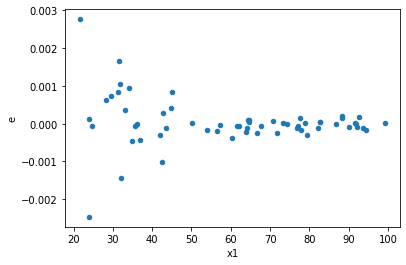

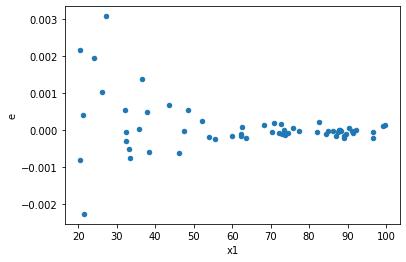

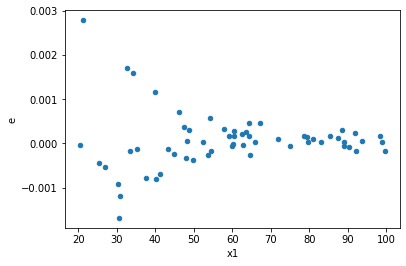

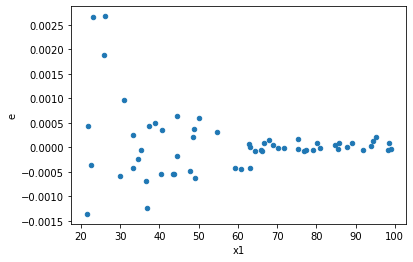

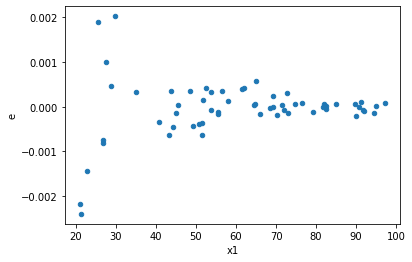

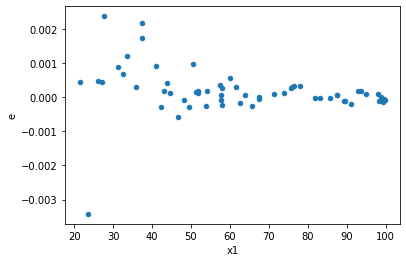

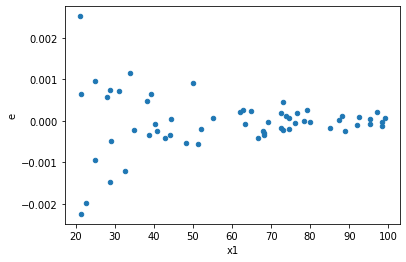

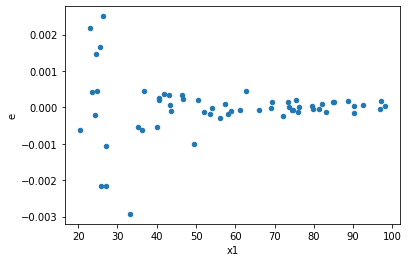

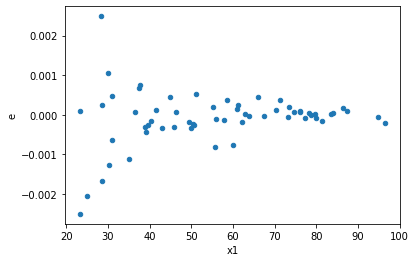

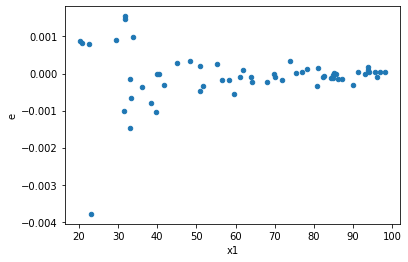

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,27.0,31.0,7.136577807963212e-07,2.902481734158549e-05,2.6431769659123006e-08,9.362844303737255e-07,35.4226918003791,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
1.0,31.0,27.0,8.357497013879878e-07,1.3920258425387474e-05,2.6959667786709283e-08,5.155651268662028e-07,19.1235712155314,1.8375745369780816e-11,0.9999999999908121,9.187872684890408e-12,Reject005=0 : Heteroscedasticity
2.0,34.0,24.0,9.291386323629948e-07,1.854964602966254e-05,2.732760683420573e-08,7.729019179026058e-07,28.28282485882266,1.8385293287792592e-12,0.9999999999990807,9.192646643896296e-13,Reject005=0 : Heteroscedasticity
8.0,23.0,35.0,5.527080586190563e-07,2.7177843408037685e-05,2.4030785157350273e-08,7.765098116582196e-07,32.313126956682446,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
9.0,37.0,21.0,1.3137460274342958e-06,9.968565132618411e-06,3.5506649390116104e-08,4.7469357774373387e-07,13.369145945825942,4.468902670140551e-08,0.9999999776554866,2.2344513350702755e-08,Reject005=0 : Heteroscedasticity
11.0,36.0,22.0,4.814155368417932e-07,2.7461586409632645e-05,1.3372653801160922e-08,1.2482539277105747e-06,93.34377052385891,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
12.0,19.0,39.0,3.70525145085443e-07,2.385353337438545e-05,1.950132342554963e-08,6.116290608816782e-07,31.363464290856964,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
16.0,32.0,26.0,1.2563397266554684e-06,2.6438884704185206e-05,3.926061645798339e-08,1.0168801809302002e-06,25.900769592307924,9.29478716216181e-13,0.9999999999995353,4.647393581080905e-13,Reject005=0 : Heteroscedasticity
19.0,32.0,26.0,6.090219923045485e-07,2.8974658907033635e-05,1.9031937259517142e-08,1.1144099579628322e-06,58.5547305440784,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,27.0,31.0,7.136577807963212e-07,2.902481734158549e-05,2.6431769659123006e-08,9.362844303737255e-07,35.4226918003791,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
1.0,31.0,27.0,8.357497013879878e-07,1.3920258425387474e-05,2.6959667786709283e-08,5.155651268662028e-07,19.1235712155314,1.8375745369780816e-11,Reject005=0 : Heteroscedasticity
2.0,34.0,24.0,9.291386323629948e-07,1.854964602966254e-05,2.732760683420573e-08,7.729019179026058e-07,28.28282485882266,1.8385293287792592e-12,Reject005=0 : Heteroscedasticity
3.0,30.0,28.0,2.4906406455472244e-05,4.251643442215387e-07,8.302135485157414e-07,1.5184440865054953e-08,0.018289801331478808,1.066447936402438e-18,Reject005=0 : Heteroscedasticity
4.0,19.0,39.0,3.9602902974869984e-05,1.0151936096734846e-06,2.0843633144668414e-06,2.6030605376243194e-08,0.01248851637119777,1.474975759460644e-14,Reject005=0 : Heteroscedasticity
5.0,32.0,26.0,4.4341278407666056e-05,1.2577602792156502e-06,1.3856649502395643e-06,4.837539535444808e-08,0.034911322066769876,2.6075690213103935e-15,Reject005=0 : Heteroscedasticity
6.0,33.0,25.0,5.445742454607951e-05,8.232129124702444e-07,1.6502249862448337e-06,3.2928516498809776e-08,0.01995395583831281,2.22670693207741e-19,Reject005=0 : Heteroscedasticity
7.0,29.0,29.0,4.790110454820541e-05,9.580571677200893e-07,1.6517622258001864e-06,3.303645405931343e-08,0.02000073227447075,1.068646675152137e-17,Reject005=0 : Heteroscedasticity
8.0,23.0,35.0,5.527080586190563e-07,2.7177843408037685e-05,2.4030785157350273e-08,7.765098116582196e-07,32.313126956682446,2.220446049250313e-16,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64